In [22]:
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import turicreate as tc
from sklearn.model_selection import train_test_split

In [23]:
KADO_PATH = 'data/KaDo.csv'


# INTEGRATE

## View data

In [24]:
df_kado = pd.read_csv(KADO_PATH)
df_kado.head()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


In [25]:
df_kado.shape

(7245522, 8)

In [26]:
df_kado.dtypes

TICKET_ID       int64
MOIS_VENTE      int64
PRIX_NET      float64
FAMILLE        object
UNIVERS        object
MAILLE         object
LIBELLE        object
CLI_ID          int64
dtype: object

In [51]:
data = df_kado#.iloc[:1000, :] # duplicate for modification
data.shape

(7245522, 8)

## Unique values

In [7]:
"""
PRODUCTS
"""
unique_famille = df_kado['FAMILLE'].nunique()
unique_maille = df_kado['MAILLE'].nunique()
unique_univers = df_kado['UNIVERS'].nunique()
unique_libelle = df_kado['LIBELLE'].nunique()
unique_cli_id = df_kado['CLI_ID'].nunique()
print("Unique Famille: ", unique_famille)
print("Unique Maille:  ", unique_maille)
print("Unique Univers: ", unique_univers)
print("Unique Libelle: ", unique_libelle)
print("Unique Clients: ", unique_cli_id)
"""
MONTHS
"""
unique_months = df_kado['MOIS_VENTE'].nunique()
print("Unique Months: ", unique_months)

Unique Famille:  9
Unique Maille:   34
Unique Univers:  105
Unique Libelle:  1484
Unique Clients:  853514
Unique Months:  12


### Null values

In [8]:
"""
PRODUCTS
"""
null_famille = df_kado['FAMILLE'].isna().sum()
null_maille = df_kado['MAILLE'].isna().sum()
null_univers = df_kado['UNIVERS'].isna().sum()
null_libelle = df_kado['LIBELLE'].isna().sum()
null_cli_id = df_kado['CLI_ID'].isna().sum()
null_prix_net = df_kado['PRIX_NET'].isna().sum()
null_ticket_id = df_kado['TICKET_ID'].isna().sum()
print("Unique Famille:   ", null_famille)
print("Unique Maille:    ", null_maille)
print("Unique Univers:   ", null_univers)
print("Unique Libelle:   ", null_libelle)
print("Unique Clients:   ", null_cli_id)
print("Unique Prix Net:  ", null_prix_net)
print("Unique Ticket ID: ", null_ticket_id)
"""
MONTHS
"""
null_months = df_kado['MOIS_VENTE'].isna().sum()
print("Unique Months:    ", null_months)

Unique Famille:    0
Unique Maille:     0
Unique Univers:    0
Unique Libelle:    0
Unique Clients:    0
Unique Prix Net:   0
Unique Ticket ID:  0
Unique Months:     0


## tldr; 
<table >
    <tr>
        <td>Total sales</td>
        <td>7 245 522</td>
    </tr>
    <tr>
        <td>Individual clients</td>
        <td>853 514</td>
    </tr>
    <tr>
        <td>Unique Famille</td>
        <td>9</td>
    </tr>
    <tr>
        <td>Unique Maille</td>
        <td>34</td>
    </tr>
    <tr>
        <td>Unique Univers</td>
        <td>105</td>
    </tr>
    <tr>
        <td>Unique Libelle</td>
        <td>1 484</td>
    </tr>
    <tr>
        <td>Unique Months</td>
        <td>12</td>
    </tr>
    <tr>
        <td>Null Values</td>
        <td>ZERO in all columns</td>
    </tr>
</table>

# ANALYZE

## Popular Items

### LIBELLE

In [ ]:
products = df_kado.groupby('LIBELLE')['LIBELLE'].count().nlargest()
products.head()

LIBELLE
DEMAQ EXPRESS PUR BLEUET FL125ML    158762
GD JDM4 LOTUS FL200ML                85914
GD JDM4 GRENADE FL200ML              81406
SVC CREME QUOTIDIENNE T75ml          72394
MDT SD DES LAGONS 150 ML             64400
Name: LIBELLE, dtype: int64

### UNIVERS

In [ ]:
univers = df_kado.groupby('UNIVERS')['UNIVERS'].count().nlargest()
univers.head()

UNIVERS
HYG_DOUCHE JARDINMONDE      762858
HYG_DOUCHE PLAISIRNATURE    376849
MAQ_ONG Vernis LUM          271075
VIS_SOIN LEVRES             238731
CORPS_SOIN DES MAINS        231810
Name: UNIVERS, dtype: int64

### FAMILLE

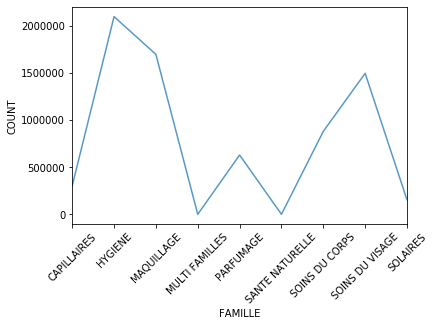

In [ ]:
family_by_month = df_kado.groupby(['FAMILLE'])['FAMILLE'].count()
family_by_month.plot(kind='line',alpha=0.75, rot=45)
plt.xlabel("FAMILLE")
plt.ylabel("COUNT")
plt.show()


### MAILLE 

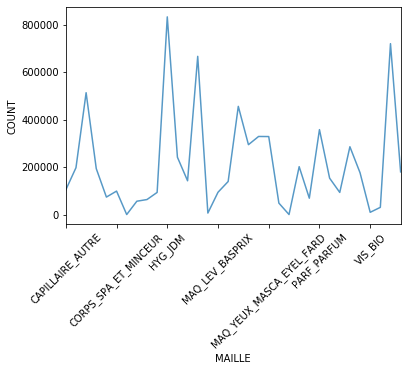

In [ ]:
maille_by_month = df_kado.groupby(['MAILLE'])['MAILLE'].count()
maille_by_month.plot(kind='line',alpha=0.75, rot=45)
plt.xlabel("MAILLE")
plt.ylabel("COUNT")
plt.show()

## Sales by type

### AVG Price / FAMILLE

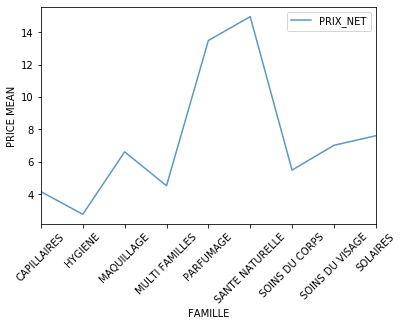

In [ ]:
family_by_month = df_kado.groupby(['FAMILLE'])['FAMILLE', 'PRIX_NET'].mean()
family_by_month.plot(kind='line',alpha=0.75, rot=45)
plt.xlabel("FAMILLE")
plt.ylabel("PRICE MEAN")
plt.show()


### AVG Price / MAILLE

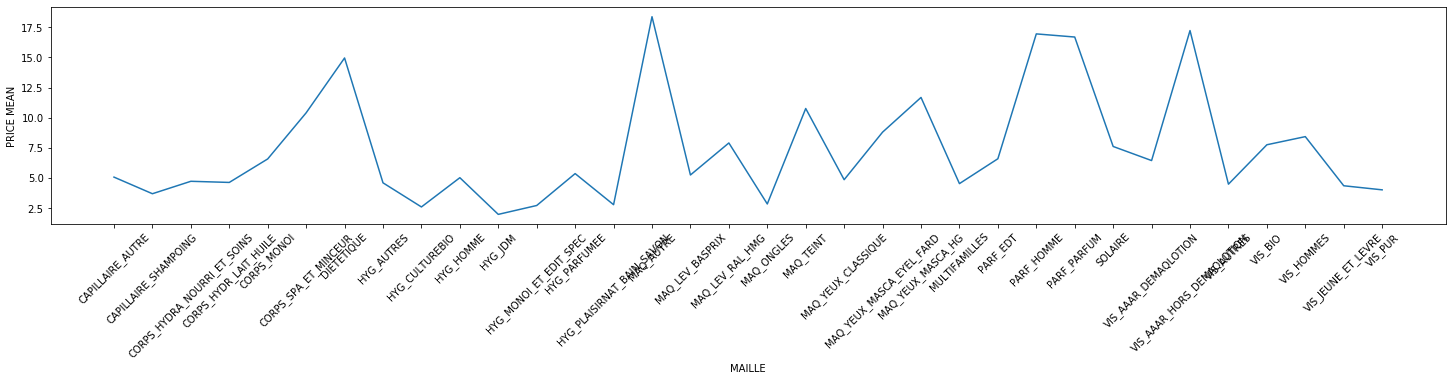

In [ ]:
maille_by_month = df_kado.groupby(['MAILLE'])['MAILLE', 'PRIX_NET'].mean()
fig= plt.figure()
fig.set_figwidth(25)

plt.plot(maille_by_month)
plt.xticks(rotation=45)
plt.xlabel("MAILLE")
plt.ylabel("PRICE MEAN")
plt.show()


### AVG Price / UNIVERS

In [ ]:
univers_by_month = df_kado.groupby(['UNIVERS'])['UNIVERS', 'PRIX_NET'].mean().sort_values('PRIX_NET', ascending=False)
univers_by_month.head()

,PRIX_NET
UNIVERS,
PARF_PARF ET EAU DE PARF,22.686870
VIS_CNUIT AAAR,19.064371
MAQ_Autres,18.372149
PARF_EAUX HOMMES,18.227247
VIS_CJOUR AAAR,17.596559


### Price / Product

In [ ]:
univers_by_month = df_kado.groupby(['LIBELLE'])['LIBELLE', 'PRIX_NET'].mean().sort_values('PRIX_NET', ascending=False)
univers_by_month.head()

,PRIX_NET
LIBELLE,
CURE 28 JRS AA GLOBAL 4X7ML,41.942739
EDP IRIS NOIR S.E VAPO 30ML,39.266667
SERUM RADIANCE 40ml ADN VEG,35.842182
EDP SE VOILE D'AMBRE VP 50ML,31.654798
"LA CURE ADN2 28 X 0,8ml",30.475000


## Users

### Users with highest monthly frequency

In [ ]:
user_by_month = df_kado.groupby(['CLI_ID', 'MOIS_VENTE'])['MOIS_VENTE'].count().sort_values(ascending=False)
user_by_month.head()

CLI_ID     MOIS_VENTE
992353520  12            233
975235463  6             217
975127123  12            214
976706610  12            192
994271835  12            191
Name: MOIS_VENTE, dtype: int64

In [ ]:
# not working but idea is the avg purchase amount per month
d = user_by_month.groupby(['CLI_ID']).mean().sort_values(ascending=False)
d.head()

CLI_ID
992353520    118.5
994539449    117.0
975235463    109.5
966639879    105.0
987102815     95.0
Name: MOIS_VENTE, dtype: float64

In [ ]:
df_kado.loc[(df_kado['CLI_ID'] == 992353520) & (df_kado['MOIS_VENTE'] == 12)]

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
5871106,36298326,12,2.21,SOINS DU CORPS,CORPS_SOIN DES MAINS,CORPS_HYDRA_NOURRI_ET_SOINS,CREME MAINS T75 ml FRUITS ROUGES,992353520
5871107,36298326,12,2.21,SOINS DU CORPS,CORPS_SOIN DES MAINS,CORPS_HYDRA_NOURRI_ET_SOINS,CREME MAINS T75 ml FRUITS ROUGES,992353520
5871108,36298326,12,2.21,SOINS DU CORPS,CORPS_SOIN DES MAINS,CORPS_HYDRA_NOURRI_ET_SOINS,CREME MAINS T75 ml FRUITS ROUGES,992353520
5871109,36298326,12,2.21,SOINS DU CORPS,CORPS_SOIN DES MAINS,CORPS_HYDRA_NOURRI_ET_SOINS,CREME MAINS T75 ml FRUITS ROUGES,992353520
5871110,36298326,12,2.21,SOINS DU CORPS,CORPS_SOIN DES MAINS,CORPS_HYDRA_NOURRI_ET_SOINS,CREME MAINS T75 ml FRUITS ROUGES,992353520
...,...,...,...,...,...,...,...,...
5871334,36298462,12,3.95,HYGIENE,HYG_DOUCHE EDT NOEL,HYG_MONOI_ET_EDIT_SPEC,DOUCH GOMMANTE FRUITS NOIRS T 200 ML,992353520
5871335,36298462,12,5.85,SOINS DU VISAGE,VIS_SOIN LEVRES,VIS_JEUNE_ET_LEVRE,BAUME NOUR LEV FRUITS NOIRS OS14 4G,992353520
5871336,36298462,12,1.95,SOINS DU VISAGE,VIS_SOIN LEVRES,VIS_JEUNE_ET_LEVRE,BAUME NOUR LEV FRUITS NOIRS OS14 4G,992353520
5871337,36298462,12,78.00,SOINS DU VISAGE,VIS_SOIN LEVRES,VIS_JEUNE_ET_LEVRE,BAUME NOUR LEV FRUITS NOIRS OS14 4G,992353520


# RECOMMENDATION SYSTEMS

## Types of recommendation systems

### Collaborative Filtering
- user based
- analyses the history of user's preferences in the past
- find similarities in their choises
- classifies the users by their preferences
### Content Based Approach
- Relies on category and description of an item
- doesn't require user interaction 
### Knowledge Based Systems
- Based on direct user feedback (filter or comment)
- Ex: "I want a phone like this but cheaper"

###
    Very typical to combine Collaborative and Content Based (Companies like Netflix, Google, etc)

# Recommendation model and data prep

## Sandbox

In [22]:
item_purchase_freq = df_kado[['CLI_ID', 'LIBELLE', 'MOIS_VENTE']].groupby(['CLI_ID', 'LIBELLE'])['MOIS_VENTE'].value_counts()
item_purchase_freq

CLI_ID     LIBELLE                                 MOIS_VENTE
1490281    CR JR PARF BIO.SPE AC.SENT.50ML         10            1
           EAU MICELLAIRE 3 THES FL200ML           10            1
           GD JDM4 PAMPLEMOUSSE FL 200ML           10            2
           GD JDM4 TIARE FL 200ML                  10            1
13290776   EDT  UN MATIN AU JARDIN  100ML  MUGUET  9             1
                                                                ..
997385337  VAO BRIL ROSE SOMPTUEUX 14 CN3 5.5ML    6             1
           VAO BRIL ROUG/SIENN 33 AX/SO CN3 5,5ML  9             1
           VAO HIBISCUS ROUGE ETE13 ANI LU4 3ML    5             1
           VAO PASTEL PARME 03 MANUC CN3 5.5ML     9             1
           ZERO TRACE SPRAY SPF 15 FL150           9             1
Name: MOIS_VENTE, Length: 6846074, dtype: int64

## Functions

In [28]:
def create_data_dummy(data):
    data_dummy = data.copy()
    data_dummy['purchase_dummy'] = 1
    return data_dummy
    
def normalize_data(data):
    item_purchase_freq_matrix = pd.pivot_table(data, values='Quantity', index='CLI_ID', columns='LIBELLE')
    item_purchase_freq_norm = (item_purchase_freq_matrix-item_purchase_freq_matrix.min())/(item_purchase_freq_matrix.max()-item_purchase_freq_matrix.min())
    d = item_purchase_freq_norm.reset_index()
    d.index.names = ['scaled_purchase_freq']
    return pd.melt(d, id_vars=['CLI_ID'], value_name='scaled_purchase_freq').dropna()

def split_data(data):
    '''
    Splits dataset into training and test set.
    
    Args:
        data (pandas.DataFrame)
        
    Returns
        train_data (tc.SFrame)
        test_data (tc.SFrame)
    '''
    train, test = train_test_split(data, test_size = .2)
    train_data = tc.SFrame(train)
    test_data = tc.SFrame(test)
    return train_data, test_data

def model(train_data, name, user_id, item_id, target, users_to_recommend, n_rec, n_display):
    if name == 'popularity':
        model = tc.popularity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target)
    elif name == 'cosine':
        model = tc.item_similarity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target, 
                                                    similarity_type='cosine')
    elif name == 'pearson':
        model = tc.item_similarity_recommender.create(train_data, 
                                                        user_id=user_id, 
                                                        item_id=item_id, 
                                                        target=target, 
                                                        similarity_type='pearson')
            
    recom = model.recommend(users=users_to_recommend, k=n_rec)
    recom.print_rows(n_display)
    return model

## Data prep

In [52]:
data['Quantity'] = df_kado.groupby(['CLI_ID', 'LIBELLE'])['LIBELLE'].transform('size')
data = data.drop_duplicates(['CLI_ID', 'LIBELLE'], keep='last')
data = data[['CLI_ID', 'LIBELLE', 'Quantity']]
data

,CLI_ID,LIBELLE,Quantity
1,1490281,GD JDM4 PAMPLEMOUSSE FL 200ML,2
2,1490281,CR JR PARF BIO.SPE AC.SENT.50ML,1
3,1490281,EAU MICELLAIRE 3 THES FL200ML,1
4,1490281,GD JDM4 TIARE FL 200ML,1
5,13290776,EDT UN MATIN AU JARDIN 100ML MUGUET,1
...,...,...,...
7245517,997385337,SVC CR MAINS ET ONGLES T75ml,1
7245518,997385337,GD JDM4 LAVANDIN DE PROVENCE 200ML,1
7245519,997385337,CRAYON REGARD PRUNE CN3 1.3G,1
7245520,997385337,MASCARA SOIN NOIR01 2014 CN3 9ML,1


In [53]:
data_norm = normalize_data(data)
data_norm

,CLI_ID,LIBELLE,scaled_purchase_freq
4966,921576316,2010 KIT MAQ PDR,1.0
42709,956762920,2010 KIT MAQ PDR,0.0
43375,956961467,2010 KIT MAQ PDR,0.0
52339,959464732,2010 KIT MAQ PDR,0.0
52569,959496677,2010 KIT MAQ PDR,0.0
...,...,...,...
1266611667,996996217,x99SS GELEE FRUITS VANIL PN2 10ML,0.0
1266612479,997007618,x99SS GELEE FRUITS VANIL PN2 10ML,0.0
1266613367,997023102,x99SS GELEE FRUITS VANIL PN2 10ML,0.0
1266613407,997023649,x99SS GELEE FRUITS VANIL PN2 10ML,0.0


### Constants

In [42]:
user_id = 'CLI_ID'
item_id = 'LIBELLE'
users_to_recommend = data.drop_duplicates(['CLI_ID'], keep='last')['CLI_ID'].to_numpy()
n_rec = 10 # number of items to recommend
n_display = 30 # to display the first few rows in an output dataset

## Model creation

In [54]:
data_dummy = create_data_dummy(data)

train_data, test_data = split_data(data)
train_data_dummy, test_data_dummy = split_data(data_dummy)
train_data_norm, test_data_norm = split_data(data_norm)

name = 'popularity'
target = 'Quantity'
popularity = model(train_data, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Preparing data set.

Data has 4728919 observations with 820707 users and 1471 items.

Data prepared in: 2.63637s

4728919 observations to process; with 1471 unique items.

+----------+--------------------------------+--------------------+------+
|  CLI_ID  |            LIBELLE             |       score        | rank |
+----------+--------------------------------+--------------------+------+
| 1490281  | EAU DES CILS OR/TRANS ETE1...  |        3.0         |  1   |
| 1490281  | FDT PINCEAU ECLAT CLAIR CN3 15 |        3.0         |  2   |
| 1490281  | 25 LINGETTES DEFROISSANTES SV  | 2.460766423357664  |  3   |
| 1490281  | RECH DCHE DOUCEUR HAMAMELI...  | 1.9100817438692097 |  4   |
| 1490281  | RECH GEL DOUC MAINS HAMAME...  | 1.8351324828263003 |  5   |
| 1490281  | DEMAQ EXPRESS PUR BLEUET F...  | 1.8199738509504173 |  6   |
| 1490281  |    LINGETTES CALMILLE 2013     | 1.8147278702733938 |  7   |
| 1490281  | REPACK CONTOUR YEUX RC2 P15ml  | 1.696728016359918  |  8   |
| 1490281  |       GEL NETT. PC 200ML       | 1.6806268576060523 |  9   |
| 1490281  | SVC REFLETS SH REF ARG FL200ML | 1.6774768353528153 |  10  |
| 13290776 | EAU DES CILS OR/TRANS ETE

In [61]:
name = 'popularity'
target = 'purchase_dummy'
pop_dummy = model(train_data_dummy, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

name = 'popularity'
target = 'scaled_purchase_freq'
pop_norm = model(train_data_norm, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Warning: Ignoring columns Quantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 4728919 observations with 821054 users and 1464 items.

Data prepared in: 3.12829s

4728919 observations to process; with 1464 unique items.

+----------+--------------------------------+-------+------+
|  CLI_ID  |            LIBELLE             | score | rank |
+----------+--------------------------------+-------+------+
| 1490281  |   DEO PARFUME 100ML EVIDENCE   |  1.0  |  1   |
| 1490281  |  SVC 3en1  nutritotal T150ml   |  1.0  |  2   |
| 1490281  | CR CORPS FONDANTE P150ml NOEL1 |  1.0  |  3   |
| 1490281  |   CONTOUR YX BS AC.SENS.15ML   |  1.0  |  4   |
| 1490281  | DEMAQ EXPRESS PUR BLEUET F...  |  1.0  |  5   |
| 1490281  |  VAO ROSE SORBET 12 LUM4 3ML   |  1.0  |  6   |
| 1490281  |    ARA SPLASH TRANSAT 100ML    |  1.0  |  7   |
| 1490281  | VAO BRILLANCE MAUVE PDRE 2...  |  1.0  |  8   |
| 1490281  | CR SECURIT EXT IP50 T 75ML...  |  1.0  |  9   |
| 1490281  |      SVC VOLUME SH 300ML       |  1.0  |  10  |
| 13290776 |   DEO PARFUME 100ML EVIDENCE   |  1.0  |  1   |
| 13290776 |  SVC 3en1  nutritotal T150ml   |  1.0  |  2   |
| 13290776 | CR CORPS FONDANTE P150ml NOEL1 |  1.0  |  3   |
| 13290776 |   CONTOUR Y

Preparing data set.

Data has 4727737 observations with 821105 users and 1269 items.

Data prepared in: 3.62301s

4727737 observations to process; with 1269 unique items.

+----------+--------------------------------+---------------------+------+
|  CLI_ID  |            LIBELLE             |        score        | rank |
+----------+--------------------------------+---------------------+------+
| 1490281  | FDT PINCEAU ECLAT CLAIR CN3 15 |         1.0         |  1   |
| 1490281  |   DEO BILLE JDM LOTUS FL50ML   |         0.5         |  2   |
| 1490281  | BAIN DOUCHE POMME D'API 250 ML |  0.3333333333333333 |  3   |
| 1490281  |      SAVON  PN POMME VPM       |         0.2         |  4   |
| 1490281  | MAXI SHAMP DOUCEUR HAMAMEL...  |         0.2         |  5   |
| 1490281  |    GINSENG BONNE MINE T50ml    |         0.2         |  6   |
| 1490281  | LIFTING CORPS ENRICHI++SVH 150 | 0.18181818181818182 |  7   |
| 1490281  | LINER SOLEI/BLEU ETE12 LU4...  | 0.16666666666666666 |  8   |
| 1490281  | VAO BRILL TAUPE ROSE OS12 ...  |        0.125        |  9   |
| 1490281  | CREME MAINS HYD T30 Ml CIT...  | 0.12244897959183673 |  10  |
| 13290776 | FDT PINCEAU 

## Recommendation model

In [56]:
name = 'cosine'
target = 'Quantity'
cos = model(train_data, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Preparing data set.

Data has 4728919 observations with 820707 users and 1471 items.

Data prepared in: 2.8369s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.124ms                        | 0          |

| 109.183ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 123.937ms                           | 0                | 0               |

| 280.423ms                           | 100              | 1471            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.4089s

+----------+--------------------------------+----------------------+------+
|  CLI_ID  |            LIBELLE             |        score         | rank |
+----------+--------------------------------+----------------------+------+
| 1490281  |   GD JDM4 CIT VERT FL 200ML    | 0.19207489490509033  |  1   |
| 1490281  |    GD JDM4 GRENADE FL200ML     | 0.18828971683979034  |  2   |
| 1490281  |    GD JDM4 ORANGE FL 200ML     | 0.18088458478450775  |  3   |
| 1490281  |     GD JDM4 LOTUS FL200ML      | 0.15867900848388672  |  4   |
| 1490281  | GD JDM4 LAVANDIN DE PROVEN...  |  0.140459805727005   |  5   |
| 1490281  |    GD JDM4 THE VERT FL200ML    |  0.137405127286911   |  6   |
| 1490281  |  GD FL200ML JDM PAMPLEMOUSSE   | 0.12950025498867035  |  7   |
| 1490281  |    CD JDM4 AMANDE  FL 200ML    |  0.1119459867477417  |  8   |
| 1490281  |    CD JDM4 COTON  FL 200ML     | 0.10519230365753174  |  9   |
| 1490281  |   CD JDM4 MACADAMIA FL 200ML   | 0.09774887561798096  |  10  |
| 13290776 |

In [57]:
name = 'cosine'
target = 'purchase_dummy'
cos_dummy = model(train_data_dummy, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

name = 'cosine'
target = 'scaled_purchase_freq'
cos_norm = model(train_data_norm, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Warning: Ignoring columns Quantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 4728919 observations with 821054 users and 1464 items.

Data prepared in: 3.10349s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.499ms                        | 0          |

| 104.729ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 115.26ms                            | 0                | 0               |

| 270.511ms                           | 100              | 1464            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.390049s

+----------+--------------------------------+----------------------+------+
|  CLI_ID  |            LIBELLE             |        score         | rank |
+----------+--------------------------------+----------------------+------+
| 1490281  |    GD JDM4 GRENADE FL200ML     | 0.16449000438054404  |  1   |
| 1490281  |   GD JDM4 CIT VERT FL 200ML    | 0.15667176246643066  |  2   |
| 1490281  |     GD JDM4 LOTUS FL200ML      |  0.1561986207962036  |  3   |
| 1490281  |    GD JDM4 ORANGE FL 200ML     | 0.14291141430536905  |  4   |
| 1490281  | GD JDM4 LAVANDIN DE PROVEN...  | 0.13016831874847412  |  5   |
| 1490281  |    GD JDM4 THE VERT FL200ML    | 0.12907890478769937  |  6   |
| 1490281  |    CD JDM4 AMANDE  FL 200ML    | 0.11523274580637614  |  7   |
| 1490281  |   CD JDM4 MAGNOLIA FL 200ML    | 0.11421865224838257  |  8   |
| 1490281  |    CD JDM4 COTON  FL 200ML     | 0.10859342416127522  |  9   |
| 1490281  |   CD JDM4 MACADAMIA FL 200ML   | 0.09799361228942871  |  10  |
| 13290776 |

Preparing data set.

Data has 4727737 observations with 821105 users and 1269 items.

Data prepared in: 3.17879s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.634ms                        | 0          |

| 93.299ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 105.637ms                           | 0                | 0               |

| 243.535ms                           | 100              | 1269            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.358893s

+----------+--------------------------------+-----------------------+------+
|  CLI_ID  |            LIBELLE             |         score         | rank |
+----------+--------------------------------+-----------------------+------+
| 1490281  | DUO PDRE HAL/MAT02 AX/SOLA...  |          0.0          |  1   |
| 1490281  | RIDES+FERMETE NUIT P50ml SV40  |          0.0          |  2   |
| 1490281  | FDT FL/MAT BEIG300 MEDIUM ...  |          0.0          |  3   |
| 1490281  |    HYDRA LAIT DEMAQ FL200ML    |          0.0          |  4   |
| 1490281  |  GD FL200ML JDM PAMPLEMOUSSE   |          0.0          |  5   |
| 1490281  |       GD ROSE FP FL200ML       |          0.0          |  6   |
| 1490281  | PETIT SAVON FRAISE PN 50G VPM  |          0.0          |  7   |
| 1490281  |    BAUME LEVRES VANILLE 4G     |          0.0          |  8   |
| 1490281  | SOIN REGAL JOUR OVALE LIFT...  |          0.0          |  9   |
| 1490281  |   DEO PARFUME 100ML EVIDENCE   |          0.0          |  10  |

In [58]:
name = 'pearson'
target = 'Quantity'
pear = model(train_data, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Preparing data set.

Data has 4728919 observations with 820707 users and 1471 items.

Data prepared in: 3.23606s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.61ms                         | 0          |

| 242.517ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 254.481ms                           | 0                | 0               |

| 815.321ms                           | 100              | 1471            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.948044s

+----------+--------------------------------+--------------------+------+
|  CLI_ID  |            LIBELLE             |       score        | rank |
+----------+--------------------------------+--------------------+------+
| 1490281  | EAU DES CILS OR/TRANS ETE1...  |        3.0         |  1   |
| 1490281  | FDT PINCEAU ECLAT CLAIR CN3 15 |        3.0         |  2   |
| 1490281  | 25 LINGETTES DEFROISSANTES SV  | 2.4607664233576547 |  3   |
| 1490281  | RECH DCHE DOUCEUR HAMAMELI...  | 1.9100817438692086 |  4   |
| 1490281  | RECH GEL DOUC MAINS HAMAME...  | 1.8320437552328792 |  5   |
| 1490281  |    LINGETTES CALMILLE 2013     | 1.8160496628759324 |  6   |
| 1490281  | DEMAQ EXPRESS PUR BLEUET F...  | 1.815412709817125  |  7   |
| 1490281  | REPACK CONTOUR YEUX RC2 P15ml  | 1.6967280163599214 |  8   |
| 1490281  |       GEL NETT. PC 200ML       | 1.6806268576060528 |  9   |
| 1490281  | SVC REFLETS SH REF ARG FL200ML | 1.6774768353528162 |  10  |
| 13290776 | EAU DES CILS OR/TRANS ETE

In [59]:
name = 'pearson'
target = 'purchase_dummy'
pear_dummy = model(train_data_dummy, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

name = 'pearson'
target = 'scaled_purchase_freq'
pear_norm = model(train_data_norm, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Warning: Ignoring columns Quantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 4728919 observations with 821054 users and 1464 items.

Data prepared in: 4.26133s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.36ms                         | 0          |

| 235.497ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 246.993ms                           | 0                | 0               |

| 916.582ms                           | 100              | 1464            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.04378s

+----------+--------------------------------+-------+------+
|  CLI_ID  |            LIBELLE             | score | rank |
+----------+--------------------------------+-------+------+
| 1490281  |   DEO PARFUME 100ML EVIDENCE   |  0.0  |  1   |
| 1490281  |  SVC 3en1  nutritotal T150ml   |  0.0  |  2   |
| 1490281  | CR CORPS FONDANTE P150ml NOEL1 |  0.0  |  3   |
| 1490281  |   CONTOUR YX BS AC.SENS.15ML   |  0.0  |  4   |
| 1490281  | DEMAQ EXPRESS PUR BLEUET F...  |  0.0  |  5   |
| 1490281  |  VAO ROSE SORBET 12 LUM4 3ML   |  0.0  |  6   |
| 1490281  |    ARA SPLASH TRANSAT 100ML    |  0.0  |  7   |
| 1490281  | VAO BRILLANCE MAUVE PDRE 2...  |  0.0  |  8   |
| 1490281  | CR SECURIT EXT IP50 T 75ML...  |  0.0  |  9   |
| 1490281  |      SVC VOLUME SH 300ML       |  0.0  |  10  |
| 13290776 |   DEO PARFUME 100ML EVIDENCE   |  0.0  |  1   |
| 13290776 |  SVC 3en1  nutritotal T150ml   |  0.0  |  2   |
| 13290776 | CR CORPS FONDANTE P150ml NOEL1 |  0.0  |  3   |
| 13290776 |   CONTOUR Y

Preparing data set.

Data has 4727737 observations with 821105 users and 1269 items.

Data prepared in: 4.06327s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.751ms                        | 0          |

| 139.795ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 150.728ms                           | 0                | 0               |

| 636.485ms                           | 100              | 1269            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.752978s

+----------+--------------------------------+---------------------+------+
|  CLI_ID  |            LIBELLE             |        score        | rank |
+----------+--------------------------------+---------------------+------+
| 1490281  | FDT PINCEAU ECLAT CLAIR CN3 15 |         1.0         |  1   |
| 1490281  |   DEO BILLE JDM LOTUS FL50ML   |         0.5         |  2   |
| 1490281  | BAIN DOUCHE POMME D'API 250 ML | 0.33333333333333337 |  3   |
| 1490281  |    GINSENG BONNE MINE T50ml    | 0.20000000000000004 |  4   |
| 1490281  | MAXI SHAMP DOUCEUR HAMAMEL...  |         0.2         |  5   |
| 1490281  |      SAVON  PN POMME VPM       |         0.2         |  6   |
| 1490281  | LIFTING CORPS ENRICHI++SVH 150 | 0.18181818181818185 |  7   |
| 1490281  | LINER SOLEI/BLEU ETE12 LU4...  | 0.16666666666666669 |  8   |
| 1490281  | VAO BRILL TAUPE ROSE OS12 ...  | 0.12500000000000003 |  9   |
| 1490281  | CREME MAINS HYD T30 Ml CIT...  | 0.12244897959183676 |  10  |
| 13290776 | FDT PINCEAU 

## Model evaluation

In [62]:
models_w_counts = [popularity, cos, pear]
models_w_dummy = [pop_dummy, cos_dummy, pear_dummy]
models_w_norm = [pop_norm, cos_norm, pear_norm]
names_w_counts = ['Popularity Model on Purchase Counts', 'Cosine Similarity on Purchase Counts', 'Pearson Similarity on Purchase Counts']
names_w_dummy = ['Popularity Model on Purchase Dummy', 'Cosine Similarity on Purchase Dummy', 'Pearson Similarity on Purchase Dummy']
names_w_norm = ['Popularity Model on Scaled Purchase Counts', 'Cosine Similarity on Scaled Purchase Counts', 'Pearson Similarity on Scaled Purchase Counts']

In [63]:
eval_counts = tc.recommender.util.compare_models(test_data, models_w_counts, model_names=names_w_counts)
eval_dummy = tc.recommender.util.compare_models(test_data_dummy, models_w_dummy, model_names=names_w_dummy)
eval_norm = tc.recommender.util.compare_models(test_data_norm, models_w_norm, model_names=names_w_norm)

PROGRESS: Evaluate model Popularity Model on Purchase Counts


recommendations finished on 1000/529574 queries. users per second: 8977.55

recommendations finished on 2000/529574 queries. users per second: 9099.8

recommendations finished on 3000/529574 queries. users per second: 9217.81

recommendations finished on 4000/529574 queries. users per second: 9384.19

recommendations finished on 5000/529574 queries. users per second: 9440.89

recommendations finished on 6000/529574 queries. users per second: 9535.42

recommendations finished on 7000/529574 queries. users per second: 9706.88

recommendations finished on 8000/529574 queries. users per second: 9559.11

recommendations finished on 9000/529574 queries. users per second: 9531.64

recommendations finished on 10000/529574 queries. users per second: 9604.17

recommendations finished on 11000/529574 queries. users per second: 9405.14

recommendations finished on 12000/529574 queries. users per second: 8769.11

recommendations finished on 13000/529574 queries. users per second: 7449.2

recommendations finished on 14000/529574 queries. users per second: 6178.97

recommendations finished on 15000/529574 queries. users per second: 5666.59

recommendations finished on 16000/529574 queries. users per second: 5348

recommendations finished on 17000/529574 queries. users per second: 5287.38

recommendations finished on 18000/529574 queries. users per second: 5341.21

recommendations finished on 19000/529574 queries. users per second: 5433.87

recommendations finished on 20000/529574 queries. users per second: 5565.54

recommendations finished on 21000/529574 queries. users per second: 5640.02

recommendations finished on 22000/529574 queries. users per second: 5664.06

recommendations finished on 23000/529574 queries. users per second: 5697.27

recommendations finished on 24000/529574 queries. users per second: 5734.63

recommendations finished on 25000/529574 queries. users per second: 5791.32

recommendations finished on 26000/529574 queries. users per second: 5844.07

recommendations finished on 27000/529574 queries. users per second: 5892.08

recommendations finished on 28000/529574 queries. users per second: 5932.96

recommendations finished on 29000/529574 queries. users per second: 5976.62

recommendations finished on 30000/529574 queries. users per second: 6023.34

recommendations finished on 31000/529574 queries. users per second: 6057.83

recommendations finished on 32000/529574 queries. users per second: 6094.53

recommendations finished on 33000/529574 queries. users per second: 6138.29

recommendations finished on 34000/529574 queries. users per second: 6175.21

recommendations finished on 35000/529574 queries. users per second: 6168.45

recommendations finished on 36000/529574 queries. users per second: 6164.57

recommendations finished on 37000/529574 queries. users per second: 6173.98

recommendations finished on 38000/529574 queries. users per second: 6180.07

recommendations finished on 39000/529574 queries. users per second: 6166.27

recommendations finished on 40000/529574 queries. users per second: 6171.47

recommendations finished on 41000/529574 queries. users per second: 6187.57

recommendations finished on 42000/529574 queries. users per second: 6176.42

recommendations finished on 43000/529574 queries. users per second: 6180.23

recommendations finished on 44000/529574 queries. users per second: 6192.07

recommendations finished on 45000/529574 queries. users per second: 6190.48

recommendations finished on 46000/529574 queries. users per second: 6168.54

recommendations finished on 47000/529574 queries. users per second: 6180.34

recommendations finished on 48000/529574 queries. users per second: 6210.45

recommendations finished on 49000/529574 queries. users per second: 6244.42

recommendations finished on 50000/529574 queries. users per second: 6257.58

recommendations finished on 51000/529574 queries. users per second: 6280.14

recommendations finished on 52000/529574 queries. users per second: 6321.76

recommendations finished on 53000/529574 queries. users per second: 6365.84

recommendations finished on 54000/529574 queries. users per second: 6385.31

recommendations finished on 55000/529574 queries. users per second: 6422.23

recommendations finished on 56000/529574 queries. users per second: 6441.95

recommendations finished on 57000/529574 queries. users per second: 6463.26

recommendations finished on 58000/529574 queries. users per second: 6500.27

recommendations finished on 59000/529574 queries. users per second: 6534.8

recommendations finished on 60000/529574 queries. users per second: 6569.35

recommendations finished on 61000/529574 queries. users per second: 6599.55

recommendations finished on 62000/529574 queries. users per second: 6624.67

recommendations finished on 63000/529574 queries. users per second: 6648.8

recommendations finished on 64000/529574 queries. users per second: 6678.34

recommendations finished on 65000/529574 queries. users per second: 6708.14

recommendations finished on 66000/529574 queries. users per second: 6731.73

recommendations finished on 67000/529574 queries. users per second: 6746.87

recommendations finished on 68000/529574 queries. users per second: 6765.36

recommendations finished on 69000/529574 queries. users per second: 6776

recommendations finished on 70000/529574 queries. users per second: 6804.31

recommendations finished on 71000/529574 queries. users per second: 6826.17

recommendations finished on 72000/529574 queries. users per second: 6853.08

recommendations finished on 73000/529574 queries. users per second: 6875.84

recommendations finished on 74000/529574 queries. users per second: 6898.59

recommendations finished on 75000/529574 queries. users per second: 6917.6

recommendations finished on 76000/529574 queries. users per second: 6937.06

recommendations finished on 77000/529574 queries. users per second: 6958.16

recommendations finished on 78000/529574 queries. users per second: 6986.07

recommendations finished on 79000/529574 queries. users per second: 7015.31

recommendations finished on 80000/529574 queries. users per second: 7035.82

recommendations finished on 81000/529574 queries. users per second: 7029.62

recommendations finished on 82000/529574 queries. users per second: 7054.85

recommendations finished on 83000/529574 queries. users per second: 7076.65

recommendations finished on 84000/529574 queries. users per second: 7101.11

recommendations finished on 85000/529574 queries. users per second: 7120.11

recommendations finished on 86000/529574 queries. users per second: 7137.88

recommendations finished on 87000/529574 queries. users per second: 7160.54

recommendations finished on 88000/529574 queries. users per second: 7181.71

recommendations finished on 89000/529574 queries. users per second: 7199.3

recommendations finished on 90000/529574 queries. users per second: 7217.29

recommendations finished on 91000/529574 queries. users per second: 7232.64

recommendations finished on 92000/529574 queries. users per second: 7247.11

recommendations finished on 93000/529574 queries. users per second: 7259.96

recommendations finished on 94000/529574 queries. users per second: 7272.76

recommendations finished on 95000/529574 queries. users per second: 7288.34

recommendations finished on 96000/529574 queries. users per second: 7301.62

recommendations finished on 97000/529574 queries. users per second: 7306.37

recommendations finished on 98000/529574 queries. users per second: 7322.67

recommendations finished on 99000/529574 queries. users per second: 7333.42

recommendations finished on 100000/529574 queries. users per second: 7341.73

recommendations finished on 101000/529574 queries. users per second: 7353.66

recommendations finished on 102000/529574 queries. users per second: 7363.78

recommendations finished on 103000/529574 queries. users per second: 7364.35

recommendations finished on 104000/529574 queries. users per second: 7367.96

recommendations finished on 105000/529574 queries. users per second: 7371.42

recommendations finished on 106000/529574 queries. users per second: 7366.89

recommendations finished on 107000/529574 queries. users per second: 7360.21

recommendations finished on 108000/529574 queries. users per second: 7317.57

recommendations finished on 109000/529574 queries. users per second: 7308.94

recommendations finished on 110000/529574 queries. users per second: 7317.88

recommendations finished on 111000/529574 queries. users per second: 7331.48

recommendations finished on 112000/529574 queries. users per second: 7343.98

recommendations finished on 113000/529574 queries. users per second: 7352.18

recommendations finished on 114000/529574 queries. users per second: 7355.18

recommendations finished on 115000/529574 queries. users per second: 7360.38

recommendations finished on 116000/529574 queries. users per second: 7372.18

recommendations finished on 117000/529574 queries. users per second: 7381.72

recommendations finished on 118000/529574 queries. users per second: 7393.12

recommendations finished on 119000/529574 queries. users per second: 7403.73

recommendations finished on 120000/529574 queries. users per second: 7414.89

recommendations finished on 121000/529574 queries. users per second: 7423.97

recommendations finished on 122000/529574 queries. users per second: 7436.91

recommendations finished on 123000/529574 queries. users per second: 7446.45

recommendations finished on 124000/529574 queries. users per second: 7456.09

recommendations finished on 125000/529574 queries. users per second: 7462.08

recommendations finished on 126000/529574 queries. users per second: 7468.83

recommendations finished on 127000/529574 queries. users per second: 7475.72

recommendations finished on 128000/529574 queries. users per second: 7483.83

recommendations finished on 129000/529574 queries. users per second: 7492.4

recommendations finished on 130000/529574 queries. users per second: 7497.91

recommendations finished on 131000/529574 queries. users per second: 7506.82

recommendations finished on 132000/529574 queries. users per second: 7511.46

recommendations finished on 133000/529574 queries. users per second: 7515.24

recommendations finished on 134000/529574 queries. users per second: 7521.98

recommendations finished on 135000/529574 queries. users per second: 7531.97

recommendations finished on 136000/529574 queries. users per second: 7537.59

recommendations finished on 137000/529574 queries. users per second: 7537.55

recommendations finished on 138000/529574 queries. users per second: 7541.2

recommendations finished on 139000/529574 queries. users per second: 7547.33

recommendations finished on 140000/529574 queries. users per second: 7555.87

recommendations finished on 141000/529574 queries. users per second: 7562.04

recommendations finished on 142000/529574 queries. users per second: 7568.01

recommendations finished on 143000/529574 queries. users per second: 7573.12

recommendations finished on 144000/529574 queries. users per second: 7579.34

recommendations finished on 145000/529574 queries. users per second: 7588.51

recommendations finished on 146000/529574 queries. users per second: 7595.48

recommendations finished on 147000/529574 queries. users per second: 7599.23

recommendations finished on 148000/529574 queries. users per second: 7605.19

recommendations finished on 149000/529574 queries. users per second: 7608.16

recommendations finished on 150000/529574 queries. users per second: 7605.69

recommendations finished on 151000/529574 queries. users per second: 7602.4

recommendations finished on 152000/529574 queries. users per second: 7603.36

recommendations finished on 153000/529574 queries. users per second: 7599.59

recommendations finished on 154000/529574 queries. users per second: 7596.66

recommendations finished on 155000/529574 queries. users per second: 7602.21

recommendations finished on 156000/529574 queries. users per second: 7612.35

recommendations finished on 157000/529574 queries. users per second: 7609.45

recommendations finished on 158000/529574 queries. users per second: 7612.03

recommendations finished on 159000/529574 queries. users per second: 7619.59

recommendations finished on 160000/529574 queries. users per second: 7622.92

recommendations finished on 161000/529574 queries. users per second: 7627.78

recommendations finished on 162000/529574 queries. users per second: 7634.05

recommendations finished on 163000/529574 queries. users per second: 7636.6

recommendations finished on 164000/529574 queries. users per second: 7641.41

recommendations finished on 165000/529574 queries. users per second: 7646.95

recommendations finished on 166000/529574 queries. users per second: 7652.96

recommendations finished on 167000/529574 queries. users per second: 7655.38

recommendations finished on 168000/529574 queries. users per second: 7657.28

recommendations finished on 169000/529574 queries. users per second: 7663.1

recommendations finished on 170000/529574 queries. users per second: 7666.69

recommendations finished on 171000/529574 queries. users per second: 7673.47

recommendations finished on 172000/529574 queries. users per second: 7675.33

recommendations finished on 173000/529574 queries. users per second: 7680.1

recommendations finished on 174000/529574 queries. users per second: 7684.61

recommendations finished on 175000/529574 queries. users per second: 7689.66

recommendations finished on 176000/529574 queries. users per second: 7690.7

recommendations finished on 177000/529574 queries. users per second: 7694.9

recommendations finished on 178000/529574 queries. users per second: 7699.25

recommendations finished on 179000/529574 queries. users per second: 7703.65

recommendations finished on 180000/529574 queries. users per second: 7708.35

recommendations finished on 181000/529574 queries. users per second: 7712.88

recommendations finished on 182000/529574 queries. users per second: 7719

recommendations finished on 183000/529574 queries. users per second: 7724.73

recommendations finished on 184000/529574 queries. users per second: 7727.58

recommendations finished on 185000/529574 queries. users per second: 7726.34

recommendations finished on 186000/529574 queries. users per second: 7726.71

recommendations finished on 187000/529574 queries. users per second: 7725.25

recommendations finished on 188000/529574 queries. users per second: 7720.3

recommendations finished on 189000/529574 queries. users per second: 7718.02

recommendations finished on 190000/529574 queries. users per second: 7708.16

recommendations finished on 191000/529574 queries. users per second: 7710.24

recommendations finished on 192000/529574 queries. users per second: 7711.66

recommendations finished on 193000/529574 queries. users per second: 7712.94

recommendations finished on 194000/529574 queries. users per second: 7715.39

recommendations finished on 195000/529574 queries. users per second: 7715.77

recommendations finished on 196000/529574 queries. users per second: 7716.85

recommendations finished on 197000/529574 queries. users per second: 7718.54

recommendations finished on 198000/529574 queries. users per second: 7722.59

recommendations finished on 199000/529574 queries. users per second: 7721.95

recommendations finished on 200000/529574 queries. users per second: 7724.14

recommendations finished on 201000/529574 queries. users per second: 7725.9

recommendations finished on 202000/529574 queries. users per second: 7726.23

recommendations finished on 203000/529574 queries. users per second: 7728.46

recommendations finished on 204000/529574 queries. users per second: 7730.94

recommendations finished on 205000/529574 queries. users per second: 7733.09

recommendations finished on 206000/529574 queries. users per second: 7734.87

recommendations finished on 207000/529574 queries. users per second: 7735.75

recommendations finished on 208000/529574 queries. users per second: 7737.12

recommendations finished on 209000/529574 queries. users per second: 7739.93

recommendations finished on 210000/529574 queries. users per second: 7741.28

recommendations finished on 211000/529574 queries. users per second: 7744.2

recommendations finished on 212000/529574 queries. users per second: 7745.13

recommendations finished on 213000/529574 queries. users per second: 7749.97

recommendations finished on 214000/529574 queries. users per second: 7750.12

recommendations finished on 215000/529574 queries. users per second: 7748.06

recommendations finished on 216000/529574 queries. users per second: 7747.1

recommendations finished on 217000/529574 queries. users per second: 7748.76

recommendations finished on 218000/529574 queries. users per second: 7747.16

recommendations finished on 219000/529574 queries. users per second: 7749.06

recommendations finished on 220000/529574 queries. users per second: 7752.12

recommendations finished on 221000/529574 queries. users per second: 7735.2

recommendations finished on 222000/529574 queries. users per second: 7735.61

recommendations finished on 223000/529574 queries. users per second: 7738.12

recommendations finished on 224000/529574 queries. users per second: 7738.13

recommendations finished on 225000/529574 queries. users per second: 7738.14

recommendations finished on 226000/529574 queries. users per second: 7738.08

recommendations finished on 227000/529574 queries. users per second: 7738.58

recommendations finished on 228000/529574 queries. users per second: 7735.08

recommendations finished on 229000/529574 queries. users per second: 7733.83

recommendations finished on 230000/529574 queries. users per second: 7728.95

recommendations finished on 231000/529574 queries. users per second: 7726.57

recommendations finished on 232000/529574 queries. users per second: 7725.37

recommendations finished on 233000/529574 queries. users per second: 7728.44

recommendations finished on 234000/529574 queries. users per second: 7728.32

recommendations finished on 235000/529574 queries. users per second: 7732.35

recommendations finished on 236000/529574 queries. users per second: 7735.61

recommendations finished on 237000/529574 queries. users per second: 7738.11

recommendations finished on 238000/529574 queries. users per second: 7736.07

recommendations finished on 239000/529574 queries. users per second: 7738.65

recommendations finished on 240000/529574 queries. users per second: 7742

recommendations finished on 241000/529574 queries. users per second: 7739.49

recommendations finished on 242000/529574 queries. users per second: 7736.07

recommendations finished on 243000/529574 queries. users per second: 7735.49

recommendations finished on 244000/529574 queries. users per second: 7731.08

recommendations finished on 245000/529574 queries. users per second: 7727.08

recommendations finished on 246000/529574 queries. users per second: 7720.77

recommendations finished on 247000/529574 queries. users per second: 7715.73

recommendations finished on 248000/529574 queries. users per second: 7711.6

recommendations finished on 249000/529574 queries. users per second: 7708.12

recommendations finished on 250000/529574 queries. users per second: 7705.06

recommendations finished on 251000/529574 queries. users per second: 7705.07

recommendations finished on 252000/529574 queries. users per second: 7700.93

recommendations finished on 253000/529574 queries. users per second: 7699.52

recommendations finished on 254000/529574 queries. users per second: 7698.02

recommendations finished on 255000/529574 queries. users per second: 7696.15

recommendations finished on 256000/529574 queries. users per second: 7691.75

recommendations finished on 257000/529574 queries. users per second: 7689.49

recommendations finished on 258000/529574 queries. users per second: 7689.34

recommendations finished on 259000/529574 queries. users per second: 7687.69

recommendations finished on 260000/529574 queries. users per second: 7687.11

recommendations finished on 261000/529574 queries. users per second: 7683.07

recommendations finished on 262000/529574 queries. users per second: 7678.67

recommendations finished on 263000/529574 queries. users per second: 7674.4

recommendations finished on 264000/529574 queries. users per second: 7670.11

recommendations finished on 265000/529574 queries. users per second: 7672.16

recommendations finished on 266000/529574 queries. users per second: 7670.1

recommendations finished on 267000/529574 queries. users per second: 7668.1

recommendations finished on 268000/529574 queries. users per second: 7665.16

recommendations finished on 269000/529574 queries. users per second: 7661.38

recommendations finished on 270000/529574 queries. users per second: 7661.3

recommendations finished on 271000/529574 queries. users per second: 7658.95

recommendations finished on 272000/529574 queries. users per second: 7652.56

recommendations finished on 273000/529574 queries. users per second: 7649.95

recommendations finished on 274000/529574 queries. users per second: 7647.16

recommendations finished on 275000/529574 queries. users per second: 7644.36

recommendations finished on 276000/529574 queries. users per second: 7640.44

recommendations finished on 277000/529574 queries. users per second: 7637.46

recommendations finished on 278000/529574 queries. users per second: 7636.35

recommendations finished on 279000/529574 queries. users per second: 7634.92

recommendations finished on 280000/529574 queries. users per second: 7633.21

recommendations finished on 281000/529574 queries. users per second: 7630.15

recommendations finished on 282000/529574 queries. users per second: 7630.44

recommendations finished on 283000/529574 queries. users per second: 7633.76

recommendations finished on 284000/529574 queries. users per second: 7635.36

recommendations finished on 285000/529574 queries. users per second: 7638.15

recommendations finished on 286000/529574 queries. users per second: 7638.28

recommendations finished on 287000/529574 queries. users per second: 7641.58

recommendations finished on 288000/529574 queries. users per second: 7643.75

recommendations finished on 289000/529574 queries. users per second: 7645.43

recommendations finished on 290000/529574 queries. users per second: 7643.34

recommendations finished on 291000/529574 queries. users per second: 7644.23

recommendations finished on 292000/529574 queries. users per second: 7645.4

recommendations finished on 293000/529574 queries. users per second: 7646.83

recommendations finished on 294000/529574 queries. users per second: 7636.83

recommendations finished on 295000/529574 queries. users per second: 7629.56

recommendations finished on 296000/529574 queries. users per second: 7624.96

recommendations finished on 297000/529574 queries. users per second: 7620.88

recommendations finished on 298000/529574 queries. users per second: 7601.57

recommendations finished on 299000/529574 queries. users per second: 7599.08

recommendations finished on 300000/529574 queries. users per second: 7603.15

recommendations finished on 301000/529574 queries. users per second: 7605.48

recommendations finished on 302000/529574 queries. users per second: 7605.17

recommendations finished on 303000/529574 queries. users per second: 7604.18

recommendations finished on 304000/529574 queries. users per second: 7600.09

recommendations finished on 305000/529574 queries. users per second: 7600.67

recommendations finished on 306000/529574 queries. users per second: 7603.19

recommendations finished on 307000/529574 queries. users per second: 7606.48

recommendations finished on 308000/529574 queries. users per second: 7610.83

recommendations finished on 309000/529574 queries. users per second: 7614.15

recommendations finished on 310000/529574 queries. users per second: 7618.52

recommendations finished on 311000/529574 queries. users per second: 7621.21

recommendations finished on 312000/529574 queries. users per second: 7623.99

recommendations finished on 313000/529574 queries. users per second: 7627.49

recommendations finished on 314000/529574 queries. users per second: 7632.47

recommendations finished on 315000/529574 queries. users per second: 7636.32

recommendations finished on 316000/529574 queries. users per second: 7639.13

recommendations finished on 317000/529574 queries. users per second: 7641.14

recommendations finished on 318000/529574 queries. users per second: 7644.6

recommendations finished on 319000/529574 queries. users per second: 7645.66

recommendations finished on 320000/529574 queries. users per second: 7649.72

recommendations finished on 321000/529574 queries. users per second: 7651.73

recommendations finished on 322000/529574 queries. users per second: 7652.98

recommendations finished on 323000/529574 queries. users per second: 7648.19

recommendations finished on 324000/529574 queries. users per second: 7647.94

recommendations finished on 325000/529574 queries. users per second: 7647.36

recommendations finished on 326000/529574 queries. users per second: 7650.23

recommendations finished on 327000/529574 queries. users per second: 7645.54

recommendations finished on 328000/529574 queries. users per second: 7633.8

recommendations finished on 329000/529574 queries. users per second: 7625.18

recommendations finished on 330000/529574 queries. users per second: 7614.86

recommendations finished on 331000/529574 queries. users per second: 7607.54

recommendations finished on 332000/529574 queries. users per second: 7601.91

recommendations finished on 333000/529574 queries. users per second: 7602.01

recommendations finished on 334000/529574 queries. users per second: 7602.53

recommendations finished on 335000/529574 queries. users per second: 7598.21

recommendations finished on 336000/529574 queries. users per second: 7597.7

recommendations finished on 337000/529574 queries. users per second: 7599.88

recommendations finished on 338000/529574 queries. users per second: 7599.27

recommendations finished on 339000/529574 queries. users per second: 7601.69

recommendations finished on 340000/529574 queries. users per second: 7603.57

recommendations finished on 341000/529574 queries. users per second: 7603.25

recommendations finished on 342000/529574 queries. users per second: 7598.72

recommendations finished on 343000/529574 queries. users per second: 7597.22

recommendations finished on 344000/529574 queries. users per second: 7595.58

recommendations finished on 345000/529574 queries. users per second: 7566.77

recommendations finished on 346000/529574 queries. users per second: 7562.26

recommendations finished on 347000/529574 queries. users per second: 7556.6

recommendations finished on 348000/529574 queries. users per second: 7553.38

recommendations finished on 349000/529574 queries. users per second: 7551.46

recommendations finished on 350000/529574 queries. users per second: 7550.06

recommendations finished on 351000/529574 queries. users per second: 7547.73

recommendations finished on 352000/529574 queries. users per second: 7544.86

recommendations finished on 353000/529574 queries. users per second: 7538.26

recommendations finished on 354000/529574 queries. users per second: 7533.47

recommendations finished on 355000/529574 queries. users per second: 7517.31

recommendations finished on 356000/529574 queries. users per second: 7518.9

recommendations finished on 357000/529574 queries. users per second: 7520.63

recommendations finished on 358000/529574 queries. users per second: 7518.03

recommendations finished on 359000/529574 queries. users per second: 7507.7

recommendations finished on 360000/529574 queries. users per second: 7495

recommendations finished on 361000/529574 queries. users per second: 7483.92

recommendations finished on 362000/529574 queries. users per second: 7478.88

recommendations finished on 363000/529574 queries. users per second: 7477.8

recommendations finished on 364000/529574 queries. users per second: 7478.36

recommendations finished on 365000/529574 queries. users per second: 7475.98

recommendations finished on 366000/529574 queries. users per second: 7473.94

recommendations finished on 367000/529574 queries. users per second: 7475.39

recommendations finished on 368000/529574 queries. users per second: 7475.89

recommendations finished on 369000/529574 queries. users per second: 7476.23

recommendations finished on 370000/529574 queries. users per second: 7473.45

recommendations finished on 371000/529574 queries. users per second: 7468.71

recommendations finished on 372000/529574 queries. users per second: 7471.71

recommendations finished on 373000/529574 queries. users per second: 7475.09

recommendations finished on 374000/529574 queries. users per second: 7478.05

recommendations finished on 375000/529574 queries. users per second: 7481.3

recommendations finished on 376000/529574 queries. users per second: 7484.93

recommendations finished on 377000/529574 queries. users per second: 7487.35

recommendations finished on 378000/529574 queries. users per second: 7490.14

recommendations finished on 379000/529574 queries. users per second: 7492.6

recommendations finished on 380000/529574 queries. users per second: 7494.61

recommendations finished on 381000/529574 queries. users per second: 7494.11

recommendations finished on 382000/529574 queries. users per second: 7496.73

recommendations finished on 383000/529574 queries. users per second: 7499.63

recommendations finished on 384000/529574 queries. users per second: 7503.22

recommendations finished on 385000/529574 queries. users per second: 7505.06

recommendations finished on 386000/529574 queries. users per second: 7502.57

recommendations finished on 387000/529574 queries. users per second: 7495.88

recommendations finished on 388000/529574 queries. users per second: 7482.64

recommendations finished on 389000/529574 queries. users per second: 7464.39

recommendations finished on 390000/529574 queries. users per second: 7445.96

recommendations finished on 391000/529574 queries. users per second: 7439.89

recommendations finished on 392000/529574 queries. users per second: 7435.07

recommendations finished on 393000/529574 queries. users per second: 7419.37

recommendations finished on 394000/529574 queries. users per second: 7398.38

recommendations finished on 395000/529574 queries. users per second: 7380.32

recommendations finished on 396000/529574 queries. users per second: 7380.26

recommendations finished on 397000/529574 queries. users per second: 7382.84

recommendations finished on 398000/529574 queries. users per second: 7379.96

recommendations finished on 399000/529574 queries. users per second: 7381.32

recommendations finished on 400000/529574 queries. users per second: 7382.65

recommendations finished on 401000/529574 queries. users per second: 7382.34

recommendations finished on 402000/529574 queries. users per second: 7381.96

recommendations finished on 403000/529574 queries. users per second: 7382.44

recommendations finished on 404000/529574 queries. users per second: 7382.55

recommendations finished on 405000/529574 queries. users per second: 7380.72

recommendations finished on 406000/529574 queries. users per second: 7376.28

recommendations finished on 407000/529574 queries. users per second: 7370.5

recommendations finished on 408000/529574 queries. users per second: 7368.67

recommendations finished on 409000/529574 queries. users per second: 7369.51

recommendations finished on 410000/529574 queries. users per second: 7370.89

recommendations finished on 411000/529574 queries. users per second: 7370.8

recommendations finished on 412000/529574 queries. users per second: 7368.57

recommendations finished on 413000/529574 queries. users per second: 7367.31

recommendations finished on 414000/529574 queries. users per second: 7366.16

recommendations finished on 415000/529574 queries. users per second: 7361.37

recommendations finished on 416000/529574 queries. users per second: 7362.79

recommendations finished on 417000/529574 queries. users per second: 7360.92

recommendations finished on 418000/529574 queries. users per second: 7357.66

recommendations finished on 419000/529574 queries. users per second: 7359.81

recommendations finished on 420000/529574 queries. users per second: 7358.68

recommendations finished on 421000/529574 queries. users per second: 7360.02

recommendations finished on 422000/529574 queries. users per second: 7362.38

recommendations finished on 423000/529574 queries. users per second: 7362.03

recommendations finished on 424000/529574 queries. users per second: 7359.11

recommendations finished on 425000/529574 queries. users per second: 7350.87

recommendations finished on 426000/529574 queries. users per second: 7349.54

recommendations finished on 427000/529574 queries. users per second: 7351.24

recommendations finished on 428000/529574 queries. users per second: 7353.87

recommendations finished on 429000/529574 queries. users per second: 7356.29

recommendations finished on 430000/529574 queries. users per second: 7358.13

recommendations finished on 431000/529574 queries. users per second: 7360

recommendations finished on 432000/529574 queries. users per second: 7362.47

recommendations finished on 433000/529574 queries. users per second: 7364.67

recommendations finished on 434000/529574 queries. users per second: 7365.16

recommendations finished on 435000/529574 queries. users per second: 7368.04

recommendations finished on 436000/529574 queries. users per second: 7370.57

recommendations finished on 437000/529574 queries. users per second: 7374.6

recommendations finished on 438000/529574 queries. users per second: 7377.91

recommendations finished on 439000/529574 queries. users per second: 7381

recommendations finished on 440000/529574 queries. users per second: 7382.03

recommendations finished on 441000/529574 queries. users per second: 7384.02

recommendations finished on 442000/529574 queries. users per second: 7387.2

recommendations finished on 443000/529574 queries. users per second: 7390.38

recommendations finished on 444000/529574 queries. users per second: 7393.33

recommendations finished on 445000/529574 queries. users per second: 7396.43

recommendations finished on 446000/529574 queries. users per second: 7398.65

recommendations finished on 447000/529574 queries. users per second: 7401.08

recommendations finished on 448000/529574 queries. users per second: 7396.28

recommendations finished on 449000/529574 queries. users per second: 7393.99

recommendations finished on 450000/529574 queries. users per second: 7397.6

recommendations finished on 451000/529574 queries. users per second: 7400.65

recommendations finished on 452000/529574 queries. users per second: 7402.44

recommendations finished on 453000/529574 queries. users per second: 7405.46

recommendations finished on 454000/529574 queries. users per second: 7407.84

recommendations finished on 455000/529574 queries. users per second: 7410.3

recommendations finished on 456000/529574 queries. users per second: 7412.61

recommendations finished on 457000/529574 queries. users per second: 7414.67

recommendations finished on 458000/529574 queries. users per second: 7417.93

recommendations finished on 459000/529574 queries. users per second: 7420.36

recommendations finished on 460000/529574 queries. users per second: 7421.72

recommendations finished on 461000/529574 queries. users per second: 7423.62

recommendations finished on 462000/529574 queries. users per second: 7426.13

recommendations finished on 463000/529574 queries. users per second: 7426.48

recommendations finished on 464000/529574 queries. users per second: 7425.39

recommendations finished on 465000/529574 queries. users per second: 7423.78

recommendations finished on 466000/529574 queries. users per second: 7424.67

recommendations finished on 467000/529574 queries. users per second: 7427.91

recommendations finished on 468000/529574 queries. users per second: 7431.58

recommendations finished on 469000/529574 queries. users per second: 7435.31

recommendations finished on 470000/529574 queries. users per second: 7437.88

recommendations finished on 471000/529574 queries. users per second: 7440.15

recommendations finished on 472000/529574 queries. users per second: 7443.15

recommendations finished on 473000/529574 queries. users per second: 7445.52

recommendations finished on 474000/529574 queries. users per second: 7441.05

recommendations finished on 475000/529574 queries. users per second: 7439.95

recommendations finished on 476000/529574 queries. users per second: 7442.14

recommendations finished on 477000/529574 queries. users per second: 7444.38

recommendations finished on 478000/529574 queries. users per second: 7445.89

recommendations finished on 479000/529574 queries. users per second: 7447.46

recommendations finished on 480000/529574 queries. users per second: 7449.73

recommendations finished on 481000/529574 queries. users per second: 7451.44

recommendations finished on 482000/529574 queries. users per second: 7453.92

recommendations finished on 483000/529574 queries. users per second: 7456.29

recommendations finished on 484000/529574 queries. users per second: 7458.61

recommendations finished on 485000/529574 queries. users per second: 7458.88

recommendations finished on 486000/529574 queries. users per second: 7458.97

recommendations finished on 487000/529574 queries. users per second: 7461.08

recommendations finished on 488000/529574 queries. users per second: 7462.47

recommendations finished on 489000/529574 queries. users per second: 7463.98

recommendations finished on 490000/529574 queries. users per second: 7466.22

recommendations finished on 491000/529574 queries. users per second: 7468.93

recommendations finished on 492000/529574 queries. users per second: 7470.12

recommendations finished on 493000/529574 queries. users per second: 7472.54

recommendations finished on 494000/529574 queries. users per second: 7474.34

recommendations finished on 495000/529574 queries. users per second: 7476.27

recommendations finished on 496000/529574 queries. users per second: 7477.65

recommendations finished on 497000/529574 queries. users per second: 7475.9

recommendations finished on 498000/529574 queries. users per second: 7473.59

recommendations finished on 499000/529574 queries. users per second: 7473.3

recommendations finished on 500000/529574 queries. users per second: 7476.26

recommendations finished on 501000/529574 queries. users per second: 7476.99

recommendations finished on 502000/529574 queries. users per second: 7479.52

recommendations finished on 503000/529574 queries. users per second: 7481.43

recommendations finished on 504000/529574 queries. users per second: 7485.04

recommendations finished on 505000/529574 queries. users per second: 7484.26

recommendations finished on 506000/529574 queries. users per second: 7475.52

recommendations finished on 507000/529574 queries. users per second: 7461.51

recommendations finished on 508000/529574 queries. users per second: 7451.46

recommendations finished on 509000/529574 queries. users per second: 7446.75

recommendations finished on 510000/529574 queries. users per second: 7442.74

recommendations finished on 511000/529574 queries. users per second: 7442.89

recommendations finished on 512000/529574 queries. users per second: 7439.54

recommendations finished on 513000/529574 queries. users per second: 7441.91

recommendations finished on 514000/529574 queries. users per second: 7444.77

recommendations finished on 515000/529574 queries. users per second: 7446.38

recommendations finished on 516000/529574 queries. users per second: 7446.34

recommendations finished on 517000/529574 queries. users per second: 7436.79

recommendations finished on 518000/529574 queries. users per second: 7426.92

recommendations finished on 519000/529574 queries. users per second: 7417.94

recommendations finished on 520000/529574 queries. users per second: 7413.91

recommendations finished on 521000/529574 queries. users per second: 7415.33

recommendations finished on 522000/529574 queries. users per second: 7416.46

recommendations finished on 523000/529574 queries. users per second: 7420.47

recommendations finished on 524000/529574 queries. users per second: 7422.77

recommendations finished on 525000/529574 queries. users per second: 7424.65

recommendations finished on 526000/529574 queries. users per second: 7426.46

recommendations finished on 527000/529574 queries. users per second: 7427.08

recommendations finished on 528000/529574 queries. users per second: 7426.49

recommendations finished on 529000/529574 queries. users per second: 7419.43


Precision and recall summary statistics by cutoff
+--------+------------------------+------------------------+
| cutoff |     mean_precision     |      mean_recall       |
+--------+------------------------+------------------------+
|   1    | 1.8883102267105262e-06 | 1.8883102267105262e-06 |
|   2    | 9.441551133552631e-07  | 1.8883102267105262e-06 |
|   3    | 6.294367422368523e-07  | 1.8883102267105262e-06 |
|   4    | 1.4162326700328814e-06 | 2.6301463872039387e-06 |
|   5    | 1.5106481813683898e-06 | 4.5184566139144755e-06 |
|   6    | 1.258873484473679e-06  | 4.518456613914497e-06  |
|   7    | 1.079034415263159e-06  | 4.518456613914478e-06  |
|   8    | 9.441551133552561e-07  | 4.518456613914471e-06  |
|   9    | 8.392489896491192e-07  | 4.518456613914461e-06  |
|   10   | 1.321817158697369e-06  |  7.16209093130922e-06  |
+--------+------------------------+------------------------+
[10 rows x 3 columns]



AssertionError: Provided dataset must contain a target column with the same                 name as the target used during training.

In [65]:
final_model = tc.item_similarity_recommender.create(tc.SFrame(data_norm), 
                                            user_id=user_id, 
                                            item_id=item_id, 
                                            target='scaled_purchase_freq', similarity_type='cosine')
recom = final_model.recommend(users=users_to_recommend, k=n_rec)
recom.print_rows(n_display)

Preparing data set.

Data has 5909672 observations with 853494 users and 1269 items.

Data prepared in: 3.34024s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.707ms                        | 0          |

| 130.587ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 143.25ms                            | 0                | 0               |

| 450.396ms                           | 100              | 1269            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.654678s

+----------+-------------------------------+-----------------------+------+
|  CLI_ID  |            LIBELLE            |         score         | rank |
+----------+-------------------------------+-----------------------+------+
| 1490281  |    GD JDM4 ORANGE FL 200ML    | 0.0018410086631774902 |  1   |
| 1490281  |   GD JDM4 CIT VERT FL 200ML   | 0.0017633289098739624 |  2   |
| 1490281  |    GD JDM4 GRENADE FL200ML    | 0.0017622560262680054 |  3   |
| 1490281  |  GD FL200ML JDM PAMPLEMOUSSE  |  0.001591503620147705 |  4   |
| 1490281  |     GD JDM4 LOTUS FL200ML     | 0.0009731054306030273 |  5   |
| 1490281  |    GD JDM4 THE VERT FL200ML   | 0.0008880198001861572 |  6   |
| 1490281  | GD JDM4 LAVANDIN DE PROVEN... | 0.0008757859468460083 |  7   |
| 1490281  |    CD JDM4 COTON  FL 200ML    | 0.0007579028606414795 |  8   |
| 1490281  |  CD JDM4 RIZ VIOLET FL200 ML  |  0.000745922327041626 |  9   |
| 1490281  |   CD JDM4 MAGNOLIA FL 200ML   | 0.0004649162292480469 |  10  |
| 13290776 |

# Recommendation Function

In [69]:
def create_output(model, users_to_recommend, n_rec, print_csv=False):
    recomendation = model.recommend(users=users_to_recommend, k=n_rec)
    df_rec = recomendation.to_dataframe()
    df_rec['recommendedProducts'] = df_rec.groupby([user_id])[item_id] \
        .transform(lambda x: '|'.join(x.astype(str)))
    df_output = df_rec[['CLI_ID', 'recommendedProducts']].drop_duplicates() \
        .sort_values('CLI_ID').set_index('CLI_ID')
    return df_output

def customer_recomendation(customer_id):
    if customer_id not in df_output.index:
        print('Customer not found.')
        return customer_id
    return df_output.loc[customer_id]

df_output = create_output(pear_norm, users_to_recommend, n_rec, print_csv=False)
print(df_output.shape)
df_output.head()



(111, 1)


,recommendedProducts
CLI_ID,
1490281,FDT PINCEAU ECLAT CLAIR CN3 15|DEO BILLE JDM L...
13290776,FDT PINCEAU ECLAT CLAIR CN3 15|DEO BILLE JDM L...
20163348,FDT PINCEAU ECLAT CLAIR CN3 15|DEO BILLE JDM L...
20200041,FDT PINCEAU ECLAT CLAIR CN3 15|DEO BILLE JDM L...
20561854,FDT PINCEAU ECLAT CLAIR CN3 15|DEO BILLE JDM L...


In [70]:
recommendations = customer_recomendation(1490281)

recommendedProducts    FDT PINCEAU ECLAT CLAIR CN3 15|DEO BILLE JDM L...
Name: 1490281, dtype: object

In [1]:
recommendationsList = recommendations.values[0].split('|')
recommendationsList

NameError: name 'recommendations' is not defined